In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('D:/AnalytixLab/02 - Data Science Using Python(DSP)/14 Class_14/Task/LoansData.csv')

# Pre-Modeling

In [3]:
df.head(3)

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,1,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years


In [4]:
df.tail(3)

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
2497,2498,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,2499,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years
2499,2500,9000.0,5242.75,13.79%,36 months,debt_consolidation,6.76%,NY,RENT,3875.00,670-674,7.0,7589.0,0.0,10+ years


In [5]:
df.shape

(2500, 15)

In [6]:
df.dtypes

LoanID                              int64
Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
count,2500.00000,2499.000000,2499.000000,2499.000000,2497.000000,2497.000000,2497.000000
mean,1250.50000,12405.462185,12002.374186,5688.931321,10.072887,15223.184622,0.906688
std,721.83216,7802.933666,7746.767348,3963.118185,4.507416,18281.015258,1.231149
min,1.00000,1000.000000,-0.010000,588.500000,2.000000,0.000000,0.000000
25%,625.75000,6000.000000,6000.000000,3500.000000,7.000000,5584.000000,0.000000
50%,1250.50000,10000.000000,10000.000000,5000.000000,9.000000,10948.000000,0.000000
75%,1875.25000,17000.000000,16000.000000,6800.000000,13.000000,18861.000000,1.000000
max,2500.00000,35000.000000,35000.000000,102750.000000,38.000000,270800.000000,9.000000


In [9]:
df.count()

LoanID                            2500
Amount.Requested                  2499
Amount.Funded.By.Investors        2499
Interest.Rate                     2498
Loan.Length                       2500
Loan.Purpose                      2500
Debt.To.Income.Ratio              2499
State                             2500
Home.Ownership                    2499
Monthly.Income                    2499
FICO.Range                        2498
Open.CREDIT.Lines                 2497
Revolving.CREDIT.Balance          2497
Inquiries.in.the.Last.6.Months    2497
Employment.Length                 2423
dtype: int64

In [10]:
df.isna().sum()

LoanID                             0
Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

In [11]:
round(df['Monthly.Income'].var())/df['Monthly.Income'].mean()

2760.8535092214274

In [12]:
df.columns

Index(['LoanID', 'Amount.Requested', 'Amount.Funded.By.Investors',
       'Interest.Rate', 'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio',
       'State', 'Home.Ownership', 'Monthly.Income', 'FICO.Range',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length'],
      dtype='object')

# MODELING

### Data Preparation Level I

In [13]:
df.columns = df.columns.str.replace('.','_')

In [14]:
df.columns = df.columns.str.replace(' ','')

##### Type Casting

In [15]:
df.Interest_Rate = df.Interest_Rate.str.replace('%','').astype("float64")

In [16]:
df.Loan_Length = df.Loan_Length.str.replace(" months","").astype("int64")

In [17]:
df.Debt_To_Income_Ratio = df.Debt_To_Income_Ratio.str.replace("%","").astype("float64")

In [18]:
df.Employment_Length = df.Employment_Length.str.replace("< ","")
df.Employment_Length = df.Employment_Length.str.replace("years","")
df.Employment_Length = df.Employment_Length.str.replace(" year","")
df.Employment_Length = df.Employment_Length.str.replace(" ","") 
df.Employment_Length = df.Employment_Length.str.replace("+","")
df.Employment_Length = df.Employment_Length.astype("float64")

In [19]:
df[['Fico_Low', 'Fico_High']] = df.FICO_Range.str.split('-',expand=True)

In [20]:
df.Fico_Low = df.Fico_Low.astype('float64')
df.Fico_High = df.Fico_High.astype('float64')

In [21]:
df['Fico_Avg'] = (df.Fico_Low+df.Fico_High)/2

In [22]:
import pandas_profiling

In [23]:
profile_report = pandas_profiling.ProfileReport(df)

In [24]:
profile_report.to_file('profile_report.html')

In [25]:
del df['LoanID']
del df['Fico_High']
del df['Fico_Low']
del df['FICO_Range']

##### Missing Value Treatment of Y

In [26]:
df.Interest_Rate.isna().sum()

2

In [27]:
df = df.dropna(axis = 0, subset = ['Interest_Rate'])

#### Split the data in numerical and categorical

In [28]:
numeric_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]

df_cat = df[cat_var_names]

df_num = df[numeric_var_names]

In [29]:
df_Y = df.Interest_Rate

In [30]:
del df_num['Interest_Rate']

In [31]:
df_cat

,Loan_Purpose,State,Home_Ownership
0,debt_consolidation,SC,MORTGAGE
1,debt_consolidation,TX,MORTGAGE
2,debt_consolidation,CA,MORTGAGE
3,debt_consolidation,KS,MORTGAGE
4,credit_card,NJ,RENT
...,...,...,...
2495,debt_consolidation,NY,MORTGAGE
2496,home_improvement,MD,OWN
2497,debt_consolidation,PA,MORTGAGE
2498,major_purchase,NJ,RENT


In [32]:
df_num

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_Avg
0,20000.0,20000.00,36,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0
1,19200.0,19200.00,36,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0
2,35000.0,35000.00,60,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0
3,10000.0,9975.00,36,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0
4,12000.0,12000.00,36,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0
...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,60,19.23,9250.00,15.0,45880.0,1.0,8.0,707.0
2496,16000.0,16000.00,60,21.54,8903.25,18.0,18898.0,1.0,10.0,742.0
2497,10000.0,10000.00,36,4.89,2166.67,4.0,4544.0,0.0,10.0,682.0
2498,6000.0,6000.00,36,16.66,3500.00,8.0,7753.0,0.0,5.0,677.0


In [33]:
print("number of rows in the numerical dataset :",len(df_num))
print("number of rows in the categorical dataset :",len(df_cat))
print("number of rows in the Y dataset :",len(df_Y))

number of rows in the numerical dataset : 2498
number of rows in the categorical dataset : 2498
number of rows in the Y dataset : 2498


#### Missing  Value and Outlier Treatment on the Numerical Columns

In [34]:
# df_num.Amount_Requested = df_num.Amount_Requested.fillna(df_num.Amount_Requested.mean())
# df.Amount_Requested = df.Amount_Requested.clip_lower(df.Amount_Requested.quantile(0.01))
# df.Amount_Requested = df.Amount_Requested.clip_upper(df.Amount_Requested.quantile(0.99))

In [35]:
def outlier_missing_treatment(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    x = x.fillna(x.median())
    return(x)

In [36]:
df_num_cleaned = df_num.apply(outlier_missing_treatment)

<AxesSubplot:>

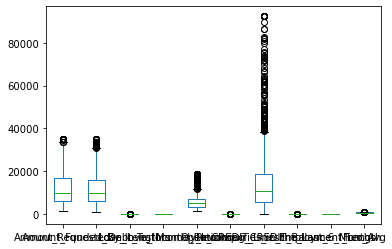

In [37]:
df_num_cleaned.plot(kind = 'box')

In [38]:
df_num_cleaned.isna().sum()

Amount_Requested                  0
Amount_Funded_By_Investors        0
Loan_Length                       0
Debt_To_Income_Ratio              0
Monthly_Income                    0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
Employment_Length                 0
Fico_Avg                          0
dtype: int64

#### Missing  Value on the Categorical Columns

In [39]:
df_cat.Loan_Purpose.mode().iloc[0]

'debt_consolidation'

In [40]:
def missing_treatment_categorical(x):
    x = x.fillna(x.mode().iloc[0])
    return(x)

In [41]:
df_cat_wt_missing = df_cat.apply(missing_treatment_categorical)

In [42]:
df_cat_wt_missing.isna().sum()

Loan_Purpose      0
State             0
Home_Ownership    0
dtype: int64

##### Dummy Variable Creation

In [43]:
df_cat_wt_missing.head()

,Loan_Purpose,State,Home_Ownership
0,debt_consolidation,SC,MORTGAGE
1,debt_consolidation,TX,MORTGAGE
2,debt_consolidation,CA,MORTGAGE
3,debt_consolidation,KS,MORTGAGE
4,credit_card,NJ,RENT


In [44]:
df_cat_with_dummies = pd.get_dummies(df_cat_wt_missing, drop_first=True)

In [45]:
df_cat_with_dummies.shape

(2498, 62)

In [46]:
len(df_Y)

2498

In [47]:
df_cat_with_dummies.dtypes[df_cat_with_dummies.dtypes=='object']

Series([], dtype: object)

In [48]:
df_cleaned = pd.concat([df_num_cleaned,df_cat_with_dummies,df_Y], axis = 1)

In [49]:
df_cleaned.shape

(2498, 73)

In [50]:
df_cleaned.isna().sum()[df_cleaned.isna().sum()>0]

Series([], dtype: int64)

In [51]:
df_cleaned.dtypes

Amount_Requested              float64
Amount_Funded_By_Investors    float64
Loan_Length                     int64
Debt_To_Income_Ratio          float64
Monthly_Income                float64
                               ...   
Home_Ownership_NONE             uint8
Home_Ownership_OTHER            uint8
Home_Ownership_OWN              uint8
Home_Ownership_RENT             uint8
Interest_Rate                 float64
Length: 73, dtype: object

In [52]:
df_cleaned.dtypes[df_cleaned.dtypes=='object']

Series([], dtype: object)

### Data Preparation Level 2 : Assumptions
- Y is normally distributed
- Decent corr b.w X and Y
- No Major corr b.w X and X variables

#### Checking if the Y variabble is normal

In [53]:
import matplotlib
from matplotlib import pyplot
import seaborn as sns

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Interest_Rate', ylabel='Density'>

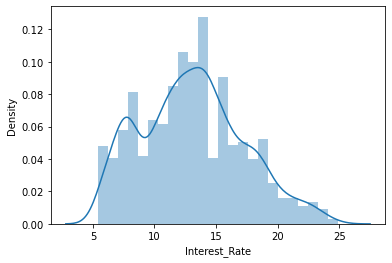

In [54]:
sns.distplot(df_cleaned.Interest_Rate)

In [55]:
print("skewness :",round(df_cleaned.Interest_Rate.skew(),2))
print("kurtosis :",round(df_cleaned.Interest_Rate.kurtosis(),2))

skewness : 0.28
kurtosis : -0.46


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Interest_Rate', ylabel='Density'>

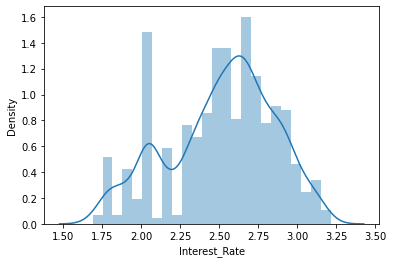

In [56]:
sns.distplot(np.log(df_cleaned.Interest_Rate))

In [57]:
print("skewness :",np.log(df_cleaned.Interest_Rate).skew())
print("kurtosis :",np.log(df_cleaned.Interest_Rate).kurtosis())

skewness : -0.3951060498317453
kurtosis : -0.5439036242758348


In [58]:
df_cleaned['ln_Interest_Rate'] = np.log(df_cleaned.Interest_Rate)

In [59]:
df_cleaned.head()

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_Avg,...,State_WA,State_WI,State_WV,State_WY,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,Interest_Rate,ln_Interest_Rate
0,20000.0,20000.0,36,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0,...,0,0,0,0,0,0,0,0,8.90,2.186051
1,19200.0,19200.0,36,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0,...,0,0,0,0,0,0,0,0,12.12,2.494857
2,35000.0,35000.0,60,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0,...,0,0,0,0,0,0,0,0,21.98,3.090133
3,10000.0,9975.0,36,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0,...,0,0,0,0,0,0,0,0,9.99,2.301585
4,12000.0,12000.0,36,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0,...,0,0,0,0,0,0,0,1,11.71,2.460443


#### Checking Correlation b/w X and Y

In [60]:
df_num.corrwith(df_cleaned.ln_Interest_Rate)

Amount_Requested                  0.303102
Amount_Funded_By_Investors        0.303316
Loan_Length                       0.386748
Debt_To_Income_Ratio              0.179010
Monthly_Income                   -0.007691
Open_CREDIT_Lines                 0.073854
Revolving_CREDIT_Balance          0.060517
Inquiries_in_the_Last_6_Months    0.171928
Employment_Length                 0.035880
Fico_Avg                         -0.742282
dtype: float64

#### Checking Correlation b/w X and X

In [61]:
corr_matrix = df_num.corr()

<AxesSubplot:>

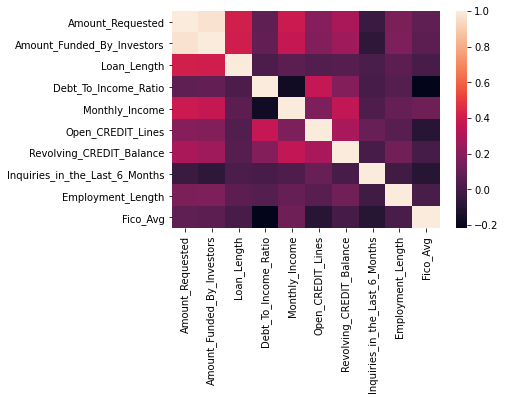

In [62]:
sns.heatmap(corr_matrix)

### Data Preparation Level 3 : Feature Engineering --> Feature Selection (Feature Reduction)

In [63]:
target = df_cleaned.ln_Interest_Rate

In [64]:
features = df_cleaned[df_cleaned.columns.difference(['Interest_Rate','ln_Interest_Rate'])]

### RFE

In [65]:
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression

In [66]:
# Initlaize the Linear Regression Model

lm = LinearRegression()

In [67]:
# Initlalzing the RFE Model

rfe = RFE(lm, n_features_to_select=10)

In [68]:
# Fit the RFE Model

rfe = rfe.fit(features, target)

In [69]:
RFE_imp_vars = features.columns[rfe.get_support()]

In [70]:
list(RFE_imp_vars)

['Home_Ownership_NONE',
 'Home_Ownership_OTHER',
 'Loan_Purpose_credit_card',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_house',
 'Loan_Purpose_moving',
 'Loan_Purpose_other',
 'Loan_Purpose_small_business',
 'State_MT',
 'State_SD']

### F Regression (Univaraite Regression)

In [71]:
from sklearn.feature_selection import f_regression

In [72]:
F_values, p_values  = f_regression(features, target )

In [73]:
F_values = pd.Series(F_values)
p_values = pd.Series(p_values)

In [74]:
cols = pd.Series(features.columns)

In [75]:
cols

0     Amount_Funded_By_Investors
1               Amount_Requested
2           Debt_To_Income_Ratio
3              Employment_Length
4                       Fico_Avg
                 ...            
67                      State_VT
68                      State_WA
69                      State_WI
70                      State_WV
71                      State_WY
Length: 72, dtype: object

In [76]:
f_reg_res = pd.concat([cols,F_values,p_values],axis=1)

In [77]:
f_reg_res.columns = ['cols','F_values','p_values']

In [78]:
f_reg_res

,cols,F_values,p_values
0,Amount_Funded_By_Investors,253.092169,2.357878e-54
1,Amount_Requested,252.639373,2.898346e-54
2,Debt_To_Income_Ratio,82.483418,2.109598e-19
3,Employment_Length,3.163799,7.540949e-02
4,Fico_Avg,3105.726205,0.000000e+00
...,...,...,...
67,State_VT,4.772185,2.901583e-02
68,State_WA,0.031011,8.602302e-01
69,State_WI,0.535373,4.644252e-01
70,State_WV,0.952258,3.292399e-01


In [79]:
top_10_f_reg = f_reg_res.sort_values(by=['F_values'],ascending=False).head(10)

In [80]:
list(top_10_f_reg.cols)

['Fico_Avg',
 'Loan_Length',
 'Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Home_Ownership_RENT']

### K Best

In [81]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [82]:
## Initalize the K Best Model

selector = SelectKBest(f_classif, k=10)

In [83]:
### Fit the model

selector.fit(features, target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


SelectKBest()

In [84]:
K_Best_10 = features.columns[selector.get_support()]

In [85]:
list(K_Best_10)

['Amount_Funded_By_Investors',
 'Fico_Avg',
 'Home_Ownership_NONE',
 'Home_Ownership_OTHER',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Length',
 'Loan_Purpose_educational',
 'State_IA',
 'State_IN',
 'State_MS']

### Corr between X and Y

In [86]:
df_cleaned.corrwith(df_cleaned.ln_Interest_Rate)

Amount_Requested              0.303174
Amount_Funded_By_Investors    0.303420
Loan_Length                   0.386748
Debt_To_Income_Ratio          0.178855
Monthly_Income                0.015095
                                ...   
Home_Ownership_OTHER          0.032261
Home_Ownership_OWN           -0.014625
Home_Ownership_RENT           0.086829
Interest_Rate                 0.981566
ln_Interest_Rate              1.000000
Length: 74, dtype: float64

In [87]:
Column_Names = pd.Series(list(df_cleaned.corrwith(df_cleaned.ln_Interest_Rate).index),name='Column_Names')

In [88]:
r_values =  pd.Series(list(df_cleaned.corrwith(df_cleaned.ln_Interest_Rate)),name='r_values')

In [89]:
corr = pd.concat([Column_Names,r_values],axis=1)

In [90]:
corr['r_values_abs'] = np.abs(corr.r_values)

In [91]:
corr

,Column_Names,r_values,r_values_abs
0,Amount_Requested,0.303174,0.303174
1,Amount_Funded_By_Investors,0.303420,0.303420
2,Loan_Length,0.386748,0.386748
3,Debt_To_Income_Ratio,0.178855,0.178855
4,Monthly_Income,0.015095,0.015095
...,...,...,...
69,Home_Ownership_OTHER,0.032261,0.032261
70,Home_Ownership_OWN,-0.014625,0.014625
71,Home_Ownership_RENT,0.086829,0.086829
72,Interest_Rate,0.981566,0.981566


In [92]:
corr_12 = corr.sort_values(by=['r_values_abs'],ascending=False).head(12)

In [93]:
list(corr_12['Column_Names'])

['ln_Interest_Rate',
 'Interest_Rate',
 'Fico_Avg',
 'Loan_Length',
 'Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Home_Ownership_RENT']

In [94]:
Final_Vars = {'Home_Ownership_NONE',
 'Home_Ownership_OTHER',
 'Loan_Purpose_credit_card',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_house',
 'Loan_Purpose_moving',
 'Loan_Purpose_other',
 'Loan_Purpose_small_business',
 'State_MT',
 'State_SD',
'Fico_Avg',
 'Loan_Length',
 'Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Home_Ownership_RENT',
'Amount_Funded_By_Investors',
 'Fico_Avg',
 'Home_Ownership_NONE',
 'Home_Ownership_OTHER',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Length',
 'Loan_Purpose_educational',
 'State_IA',
 'State_IN',
 'State_MS',
'Fico_Avg',
 'Loan_Length',
 'Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Home_Ownership_RENT',
 'Revolving_CREDIT_Balance'}

In [95]:
Final_Vars = list(Final_Vars)

In [96]:
features_reduced = features[Final_Vars]

In [97]:
features_reduced.columns

Index(['Loan_Purpose_other', 'State_SD', 'Amount_Funded_By_Investors',
       'State_MT', 'Home_Ownership_OTHER', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Loan_Purpose_major_purchase',
       'State_MS', 'Loan_Purpose_house', 'State_IN',
       'Loan_Purpose_credit_card', 'Debt_To_Income_Ratio', 'Fico_Avg',
       'Home_Ownership_NONE', 'State_IA', 'Loan_Purpose_small_business',
       'Loan_Purpose_home_improvement', 'Loan_Purpose_debt_consolidation',
       'Loan_Purpose_moving', 'Home_Ownership_RENT', 'Amount_Requested',
       'Loan_Length', 'Loan_Purpose_educational'],
      dtype='object')

### VIF

In [98]:
features_reduced

,Loan_Purpose_other,State_SD,Amount_Funded_By_Investors,State_MT,Home_Ownership_OTHER,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Loan_Purpose_major_purchase,State_MS,Loan_Purpose_house,...,Home_Ownership_NONE,State_IA,Loan_Purpose_small_business,Loan_Purpose_home_improvement,Loan_Purpose_debt_consolidation,Loan_Purpose_moving,Home_Ownership_RENT,Amount_Requested,Loan_Length,Loan_Purpose_educational
0,0,0,20000.00,0,0,14272.0,2.0,0,0,0,...,0,0,0,0,1,0,0,20000.0,36,0
1,0,0,19200.00,0,0,11140.0,1.0,0,0,0,...,0,0,0,0,1,0,0,19200.0,36,0
2,0,0,35000.00,0,0,21977.0,1.0,0,0,0,...,0,0,0,0,1,0,0,35000.0,60,0
3,0,0,9975.00,0,0,9346.0,0.0,0,0,0,...,0,0,0,0,1,0,0,10000.0,36,0
4,0,0,12000.00,0,0,14469.0,0.0,0,0,0,...,0,0,0,0,0,0,1,12000.0,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,29950.00,0,0,45880.0,1.0,0,0,0,...,0,0,0,0,1,0,0,30000.0,60,0
2496,0,0,16000.00,0,0,18898.0,1.0,0,0,0,...,0,0,0,1,0,0,0,16000.0,60,0
2497,0,0,10000.00,0,0,4544.0,0.0,0,0,0,...,0,0,0,0,1,0,0,10000.0,36,0
2498,0,0,6000.00,0,0,7753.0,0.0,1,0,0,...,0,0,0,0,0,0,1,6000.0,36,0


In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [100]:
VIF = [variance_inflation_factor(features_reduced.values,i) for i in range(features_reduced.shape[1])]

In [101]:
VIF = pd.Series(VIF, name = 'VIF')

In [102]:
cols = pd.Series(features_reduced.columns, name='Column_Name')

In [103]:
VIF_res = pd.concat([cols,VIF],axis=1)

In [104]:
VIF_10 = VIF_res.sort_values(by=['VIF'], ascending = False).head(10)

In [105]:
VIF_10

,Column_Name,VIF
21,Amount_Requested,64.663833
2,Amount_Funded_By_Investors,61.298503
13,Fico_Avg,34.845389
22,Loan_Length,21.544940
18,Loan_Purpose_debt_consolidation,9.984787
12,Debt_To_Income_Ratio,5.641625
11,Loan_Purpose_credit_card,4.024182
5,Revolving_CREDIT_Balance,2.519719
0,Loan_Purpose_other,2.352776
17,Loan_Purpose_home_improvement,2.131685


In [106]:
features_reduced2 = features_reduced[features_reduced.columns.difference(['Amount_Requested'])]

VIF = [variance_inflation_factor(features_reduced2.values,i) for i in range(features_reduced2.shape[1])]

VIF = pd.Series(VIF, name = 'VIF')

cols = pd.Series(features_reduced2.columns, name='Column_Name')

VIF_res = pd.concat([cols,VIF],axis=1)

VIF_10 = VIF_res.sort_values(by=['VIF'], ascending = False).head(10)

VIF_10

,Column_Name,VIF
2,Fico_Avg,34.845386
7,Loan_Length,21.437153
9,Loan_Purpose_debt_consolidation,9.981851
1,Debt_To_Income_Ratio,5.620531
0,Amount_Funded_By_Investors,4.871652
8,Loan_Purpose_credit_card,4.023590
17,Revolving_CREDIT_Balance,2.473846
15,Loan_Purpose_other,2.352774
11,Loan_Purpose_home_improvement,2.117174
5,Home_Ownership_RENT,2.010843


In [107]:
df_final = pd.concat([features_reduced2,df_cleaned.ln_Interest_Rate],axis=1)

In [108]:
df_final.head()

,Amount_Funded_By_Investors,Debt_To_Income_Ratio,Fico_Avg,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_RENT,Inquiries_in_the_Last_6_Months,Loan_Length,Loan_Purpose_credit_card,Loan_Purpose_debt_consolidation,...,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_small_business,Revolving_CREDIT_Balance,State_IA,State_IN,State_MS,State_MT,State_SD,ln_Interest_Rate
0,20000.0,14.90,737.0,0,0,0,2.0,36,0,1,...,0,0,0,14272.0,0,0,0,0,0,2.186051
1,19200.0,28.36,717.0,0,0,0,1.0,36,0,1,...,0,0,0,11140.0,0,0,0,0,0,2.494857
2,35000.0,23.81,692.0,0,0,0,1.0,60,0,1,...,0,0,0,21977.0,0,0,0,0,0,3.090133
3,9975.0,14.30,697.0,0,0,0,0.0,36,0,1,...,0,0,0,9346.0,0,0,0,0,0,2.301585
4,12000.0,18.78,697.0,0,0,1,0.0,36,1,0,...,0,0,0,14469.0,0,0,0,0,0,2.460443


### Data Preparation IV (Split the data into train and test)

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
train,test = train_test_split(df_final, test_size = 0.3, random_state = 123)

In [111]:
print("The number of rows in the train dataset are",len(train))
print("The number of rows in the test dataset are",len(test))
print("The number of rows in the original dataset are",len(df_final))

The number of rows in the train dataset are 1748
The number of rows in the test dataset are 750
The number of rows in the original dataset are 2498


### Model Implementation

In [112]:
y = 'ln_Interest_Rate'

In [113]:
y

'ln_Interest_Rate'

In [114]:
s = str()

In [115]:
for i in train.columns.tolist():
    s = s + '+' + i

In [116]:
equation = s[1:]

In [117]:
equation

'Amount_Funded_By_Investors+Debt_To_Income_Ratio+Fico_Avg+Home_Ownership_NONE+Home_Ownership_OTHER+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Length+Loan_Purpose_credit_card+Loan_Purpose_debt_consolidation+Loan_Purpose_educational+Loan_Purpose_home_improvement+Loan_Purpose_house+Loan_Purpose_major_purchase+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_small_business+Revolving_CREDIT_Balance+State_IA+State_IN+State_MS+State_MT+State_SD+ln_Interest_Rate'

In [118]:
equation = equation.replace("+ln_Interest_Rate","")

In [119]:
equation

'Amount_Funded_By_Investors+Debt_To_Income_Ratio+Fico_Avg+Home_Ownership_NONE+Home_Ownership_OTHER+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Length+Loan_Purpose_credit_card+Loan_Purpose_debt_consolidation+Loan_Purpose_educational+Loan_Purpose_home_improvement+Loan_Purpose_house+Loan_Purpose_major_purchase+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_small_business+Revolving_CREDIT_Balance+State_IA+State_IN+State_MS+State_MT+State_SD'

In [120]:
equation = y + "~" + equation

In [121]:
equation = equation.replace("+Interest_Rate","")

In [122]:
equation

'ln_Interest_Rate~Amount_Funded_By_Investors+Debt_To_Income_Ratio+Fico_Avg+Home_Ownership_NONE+Home_Ownership_OTHER+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Length+Loan_Purpose_credit_card+Loan_Purpose_debt_consolidation+Loan_Purpose_educational+Loan_Purpose_home_improvement+Loan_Purpose_house+Loan_Purpose_major_purchase+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_small_business+Revolving_CREDIT_Balance+State_IA+State_IN+State_MS+State_MT+State_SD'

In [123]:
import statsmodels.formula.api as smf

In [124]:
## Initalise the model and then fit the model

model = smf.ols(equation, data=train).fit()

In [125]:
print(model.summary2())

                        Results: Ordinary least squares
Model:                   OLS                  Adj. R-squared:         0.772     
Dependent Variable:      ln_Interest_Rate     AIC:                    -1379.2422
Date:                    2021-03-15 13:25     BIC:                    -1248.0527
No. Observations:        1748                 Log-Likelihood:         713.62    
Df Model:                23                   F-statistic:            257.6     
Df Residuals:            1724                 Prob (F-statistic):     0.00      
R-squared:               0.775                Scale:                  0.026238  
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
Intercept                        7.1272   0.0913  78.0302 0.0000  6.9481  7.3064
Amount_Funded_By_Investors       0.0000   0.0000  19.

In [126]:
'ln_Interest_Rate~Amount_Funded_By_Investors+Debt_To_Income_Ratio+Fico_Avg+Home_Ownership_NONE+Home_Ownership_OTHER+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Length+Loan_Purpose_credit_card+Loan_Purpose_debt_consolidation+Loan_Purpose_educational+Loan_Purpose_home_improvement+Loan_Purpose_house+Loan_Purpose_major_purchase+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_small_business+State_IA+State_IN+State_MS+State_MT+State_SD'

'ln_Interest_Rate~Amount_Funded_By_Investors+Debt_To_Income_Ratio+Fico_Avg+Home_Ownership_NONE+Home_Ownership_OTHER+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Length+Loan_Purpose_credit_card+Loan_Purpose_debt_consolidation+Loan_Purpose_educational+Loan_Purpose_home_improvement+Loan_Purpose_house+Loan_Purpose_major_purchase+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_small_business+State_IA+State_IN+State_MS+State_MT+State_SD'

In [127]:
## Iteration 1

model = smf.ols('ln_Interest_Rate~Amount_Funded_By_Investors+Debt_To_Income_Ratio+Fico_Avg+Home_Ownership_NONE+Home_Ownership_OTHER+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Length+Loan_Purpose_credit_card+Loan_Purpose_debt_consolidation+Loan_Purpose_educational+Loan_Purpose_home_improvement+Loan_Purpose_house+Loan_Purpose_major_purchase+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_small_business+State_IA+State_IN+State_MS+State_MT+State_SD', data=train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     268.9
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:25:57   Log-Likelihood:                 711.99
No. Observations:                1748   AIC:                            -1378.
Df Residuals:                    1725   BIC:                            -1252.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [128]:
## Iteration 2

model = smf.ols('ln_Interest_Rate~Amount_Funded_By_Investors+Debt_To_Income_Ratio+Fico_Avg+Home_Ownership_NONE+Home_Ownership_OTHER+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Length+Loan_Purpose_credit_card+Loan_Purpose_debt_consolidation+Loan_Purpose_educational+Loan_Purpose_home_improvement+Loan_Purpose_house+Loan_Purpose_major_purchase+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_small_business+State_IA+State_IN+State_MS+State_SD', data=train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     281.8
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:25:57   Log-Likelihood:                 711.98
No. Observations:                1748   AIC:                            -1380.
Df Residuals:                    1726   BIC:                            -1260.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [129]:
## Iteration 3

model = smf.ols('ln_Interest_Rate~Amount_Funded_By_Investors+Debt_To_Income_Ratio+Fico_Avg+Home_Ownership_NONE+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Length+Loan_Purpose_credit_card+Loan_Purpose_debt_consolidation+Loan_Purpose_educational+Loan_Purpose_home_improvement+Loan_Purpose_house+Loan_Purpose_major_purchase+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_small_business+State_IA+State_IN+State_MS+State_SD', data=train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:25:57   Log-Likelihood:                 711.89
No. Observations:                1748   AIC:                            -1382.
Df Residuals:                    1727   BIC:                            -1267.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [130]:
## Iteration 4

model = smf.ols('ln_Interest_Rate~Amount_Funded_By_Investors+Debt_To_Income_Ratio+Fico_Avg+Home_Ownership_NONE+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Length+Loan_Purpose_credit_card+Loan_Purpose_debt_consolidation+Loan_Purpose_educational+Loan_Purpose_house+Loan_Purpose_major_purchase+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_small_business+State_IA+State_IN+State_MS+State_SD', data=train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     311.8
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:25:57   Log-Likelihood:                 711.77
No. Observations:                1748   AIC:                            -1384.
Df Residuals:                    1728   BIC:                            -1274.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [131]:
## Iteration 5

model = smf.ols('ln_Interest_Rate~Amount_Funded_By_Investors+Debt_To_Income_Ratio+Fico_Avg+Home_Ownership_NONE+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Length+Loan_Purpose_debt_consolidation+Loan_Purpose_educational+Loan_Purpose_house+Loan_Purpose_major_purchase+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_small_business+State_IA+State_IN+State_MS+State_SD', data=train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     329.2
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:25:57   Log-Likelihood:                 711.73
No. Observations:                1748   AIC:                            -1385.
Df Residuals:                    1729   BIC:                            -1282.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [132]:
## Iteration 6

model = smf.ols('ln_Interest_Rate~Amount_Funded_By_Investors+Debt_To_Income_Ratio+Fico_Avg+Home_Ownership_NONE+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Length+Loan_Purpose_debt_consolidation+Loan_Purpose_educational+Loan_Purpose_house+Loan_Purpose_major_purchase+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_small_business+State_IN+State_MS+State_SD', data=train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     348.7
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:25:57   Log-Likelihood:                 711.49
No. Observations:                1748   AIC:                            -1387.
Df Residuals:                    1730   BIC:                            -1289.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [133]:
## Iteration 7

model = smf.ols('ln_Interest_Rate~Amount_Funded_By_Investors+Debt_To_Income_Ratio+Fico_Avg+Home_Ownership_NONE+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Length+Loan_Purpose_debt_consolidation+Loan_Purpose_house+Loan_Purpose_major_purchase+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_small_business+State_IN+State_MS+State_SD', data=train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     370.5
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:25:57   Log-Likelihood:                 711.04
No. Observations:                1748   AIC:                            -1388.
Df Residuals:                    1731   BIC:                            -1295.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [134]:
## Iteration 8

model = smf.ols('ln_Interest_Rate~Amount_Funded_By_Investors+Debt_To_Income_Ratio+Fico_Avg+Home_Ownership_NONE+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Length+Loan_Purpose_debt_consolidation+Loan_Purpose_house+Loan_Purpose_major_purchase+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_small_business+State_IN+State_SD', data=train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     395.0
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:25:57   Log-Likelihood:                 710.47
No. Observations:                1748   AIC:                            -1389.
Df Residuals:                    1732   BIC:                            -1301.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [135]:
## Iteration 9

model = smf.ols('ln_Interest_Rate~Amount_Funded_By_Investors+Fico_Avg+Home_Ownership_NONE+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Length+Loan_Purpose_debt_consolidation+Loan_Purpose_house+Loan_Purpose_major_purchase+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_small_business+State_IN+State_SD', data=train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     423.1
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:25:57   Log-Likelihood:                 709.87
No. Observations:                1748   AIC:                            -1390.
Df Residuals:                    1733   BIC:                            -1308.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [136]:
## Iteration 10

model = smf.ols('ln_Interest_Rate~Amount_Funded_By_Investors+Fico_Avg+Home_Ownership_NONE+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Length+Loan_Purpose_debt_consolidation+Loan_Purpose_house+Loan_Purpose_major_purchase+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_small_business+State_IN', data=train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     455.2
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:25:57   Log-Likelihood:                 708.82
No. Observations:                1748   AIC:                            -1390.
Df Residuals:                    1734   BIC:                            -1313.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [137]:
## Iteration 11

model = smf.ols('ln_Interest_Rate~Amount_Funded_By_Investors+Fico_Avg+Home_Ownership_NONE+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Length+Loan_Purpose_debt_consolidation+Loan_Purpose_major_purchase+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_small_business+State_IN', data=train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     492.6
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:25:57   Log-Likelihood:                 707.63
No. Observations:                1748   AIC:                            -1389.
Df Residuals:                    1735   BIC:                            -1318.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [138]:
## Iteration 12

model = smf.ols('ln_Interest_Rate~Amount_Funded_By_Investors+Fico_Avg+Home_Ownership_NONE+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Length+Loan_Purpose_debt_consolidation+Loan_Purpose_major_purchase+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_small_business', data=train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     536.7
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:25:57   Log-Likelihood:                 706.41
No. Observations:                1748   AIC:                            -1389.
Df Residuals:                    1736   BIC:                            -1323.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [139]:
## Iteration 13

model = smf.ols('ln_Interest_Rate~Amount_Funded_By_Investors+Fico_Avg+Home_Ownership_NONE+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Length+Loan_Purpose_major_purchase+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_small_business', data=train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     589.5
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:25:58   Log-Likelihood:                 705.03
No. Observations:                1748   AIC:                            -1388.
Df Residuals:                    1737   BIC:                            -1328.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [140]:
## Iteration 14

model = smf.ols('ln_Interest_Rate~Amount_Funded_By_Investors+Fico_Avg+Home_Ownership_NONE+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Length+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_small_business', data=train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     654.6
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:25:58   Log-Likelihood:                 704.20
No. Observations:                1748   AIC:                            -1388.
Df Residuals:                    1738   BIC:                            -1334.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [141]:
## Iteration 15

model = smf.ols('ln_Interest_Rate~Amount_Funded_By_Investors+Fico_Avg+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Length+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_small_business', data=train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     734.9
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:25:58   Log-Likelihood:                 702.39
No. Observations:                1748   AIC:                            -1387.
Df Residuals:                    1739   BIC:                            -1338.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [142]:
## Iteration 16

model = smf.ols('ln_Interest_Rate~Amount_Funded_By_Investors+Fico_Avg+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Length+Loan_Purpose_moving+Loan_Purpose_other', data=train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     838.1
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:25:58   Log-Likelihood:                 700.58
No. Observations:                1748   AIC:                            -1385.
Df Residuals:                    1740   BIC:                            -1341.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [180]:
## Iteration 16

model = smf.ols('ln_Interest_Rate~Amount_Funded_By_Investors+Fico_Avg+Home_Ownership_RENT+Inquiries_in_the_Last_6_Months+Loan_Length+Loan_Purpose_other', data=train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     975.8
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:27:35   Log-Likelihood:                 698.84
No. Observations:                1748   AIC:                            -1384.
Df Residuals:                    1741   BIC:                            -1345.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

### Model Validation

In [181]:
train_pred = np.exp(model.predict(train))

In [182]:
test_pred = np.exp(model.predict(test))

In [183]:
train_Y = np.exp(train.ln_Interest_Rate)

In [184]:
test_Y = np.exp(test.ln_Interest_Rate)

In [185]:
from sklearn import metrics
import scipy.stats as stats

#### Train Evaluation

In [186]:
MAPE_train = round(np.mean(np.abs((train_Y - train_pred)/train_Y))*100,2)
print('MAPE_train',MAPE_train)

R2_train = round(metrics.r2_score(train_Y ,train_pred),4)
print('R2_train',R2_train)

Corr_train = stats.stats.pearsonr(train_Y , train_pred)
print('Corr_train',round(Corr_train[0],2))

RMSE_train = metrics.mean_squared_error(train_Y , train_pred)
print('RMSE_train',round(RMSE_train,2))

MAPE_train 12.23
R2_train 0.7853
Corr_train 0.89
RMSE_train 3.71


#### Test Evaluation

In [187]:
MAPE_test = round(np.mean(np.abs((test_Y - test_pred)/test_Y))*100,2)
print('MAPE_test',MAPE_test)

R2_test = round(metrics.r2_score(test_Y ,test_pred),4)
print('R2_test',R2_test)

Corr_test = stats.stats.pearsonr(test_Y , test_pred)
print('Corr_test',round(Corr_test[0],2))

RMSE_test = metrics.mean_squared_error(test_Y , test_pred)
print('RMSE_test',round(RMSE_test,2))

MAPE_test 12.17
R2_test 0.778
Corr_test 0.88
RMSE_test 3.95


### Decile Analysis

- train

In [188]:
# Creating the values of train

In [189]:
train2 = pd.concat([train_Y,train_pred],axis=1)

In [190]:
train2.columns = ['Y','Pred_Y']

In [191]:
#Decile analysis - Train

train2['Deciles']=pd.qcut(train2['Pred_Y'],10, labels=False)

In [192]:
train2.loc[train2.Deciles==2,:]

,Y,Pred_Y,Deciles
1782,7.90,10.470805,2
1006,12.12,10.655623,2
1342,12.69,10.132701,2
1176,11.58,10.164471,2
814,11.14,9.707888,2
...,...,...,...
1741,7.90,9.765620,2
1418,7.88,9.653871,2
1847,8.90,10.743223,2
2468,7.29,10.055577,2


In [193]:
avg_actual = train2[['Deciles','Y']].groupby(train2.Deciles).mean().sort_index(ascending=True)['Y']

In [194]:
avg_actual

Deciles
0     7.418800
1     8.726171
2     9.683143
3    11.227414
4    12.663486
5    13.561600
6    14.709253
7    15.804286
8    16.793029
9    19.823429
Name: Y, dtype: float64

In [195]:
avg_pred = train2[['Deciles','Pred_Y']].groupby(train2.Deciles).mean().sort_index(ascending=True)['Pred_Y']

In [196]:
avg_pred

Deciles
0     7.007790
1     8.966862
2    10.249646
3    11.343238
4    12.381941
5    13.260584
6    14.112100
7    14.969003
8    16.319440
9    20.262443
Name: Pred_Y, dtype: float64

In [197]:
Decile_analysis_train = pd.concat([avg_actual, avg_pred], axis=1)

In [198]:
Decile_analysis_train

,Y,Pred_Y
Deciles,,
0,7.418800,7.007790
1,8.726171,8.966862
2,9.683143,10.249646
3,11.227414,11.343238
4,12.663486,12.381941
5,13.561600,13.260584
6,14.709253,14.112100
7,15.804286,14.969003
8,16.793029,16.319440


- test

In [199]:
# Creating the values of train

In [200]:
test2 = pd.concat([test_Y,test_pred],axis=1)

In [201]:
test2.columns = ['Y','Pred_Y']

In [202]:
test2

,Y,Pred_Y
1239,17.77,13.293889
2065,21.00,20.615244
2441,12.68,14.320281
2096,9.99,9.510271
289,10.36,8.573663
...,...,...
182,12.69,12.239642
1067,6.03,6.527654
978,14.33,13.659211
2236,17.93,17.031667


In [203]:
#Decile analysis - test

test2['Deciles']=pd.qcut(test2['Pred_Y'],10, labels=False)

In [204]:
avg_actual = test2[['Deciles','Y']].groupby(test2.Deciles).mean().sort_index(ascending=True)['Y']

In [205]:
avg_actual

Deciles
0     7.157733
1     8.946133
2    10.018133
3    11.495200
4    12.688133
5    13.521867
6    14.385867
7    16.005333
8    17.048933
9    19.951600
Name: Y, dtype: float64

In [206]:
avg_pred = test2[['Deciles','Pred_Y']].groupby(test2.Deciles).mean().sort_index(ascending=True)['Pred_Y']

In [207]:
avg_pred

Deciles
0     6.861900
1     9.024096
2    10.279721
3    11.372526
4    12.374024
5    13.129877
6    13.973503
7    14.942269
8    16.407187
9    20.413413
Name: Pred_Y, dtype: float64

In [208]:
Decile_analysis_test = pd.concat([avg_actual, avg_pred], axis=1)

In [209]:
Decile_analysis_test

,Y,Pred_Y
Deciles,,
0,7.157733,6.861900
1,8.946133,9.024096
2,10.018133,10.279721
3,11.495200,11.372526
4,12.688133,12.374024
5,13.521867,13.129877
6,14.385867,13.973503
7,16.005333,14.942269
8,17.048933,16.407187


#### Residual Analysis

<AxesSubplot:>

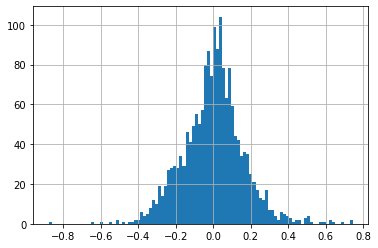

In [210]:
model.resid.hist(bins=100)

### Saving the model as a pickle object

In [211]:
#Lets save everything in metrics_df to pickle object

import pickle

In [212]:
# Saving the model as a pickle object

with open('ROI_Predictor.pkl', 'wb') as f:
    pickle.dump(model, f)

In [176]:
del model

In [217]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     975.8
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:28:25   Log-Likelihood:                 698.84
No. Observations:                1748   AIC:                            -1384.
Df Residuals:                    1741   BIC:                            -1345.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [214]:
# importing the model

with open('ROI_Predictor.pkl', 'rb') as f:
    model = pickle.load(f)

In [216]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     975.8
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:28:07   Log-Likelihood:                 698.84
No. Observations:                1748   AIC:                            -1384.
Df Residuals:                    1741   BIC:                            -1345.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   